In [1]:
from stg import STG
import numpy as np
import scipy.stats # for creating a simple dataset 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from dataset import create_twomoon_dataset
import torch


In [2]:


n_size = 1000 #Number of samples
p_size = 20   #Number of features
X_data, y_data=create_twomoon_dataset(n_size,p_size)
print(X_data.shape)
print(y_data.shape)

(1000,)
(1000, 20)
(1000, 20)
(1000,)


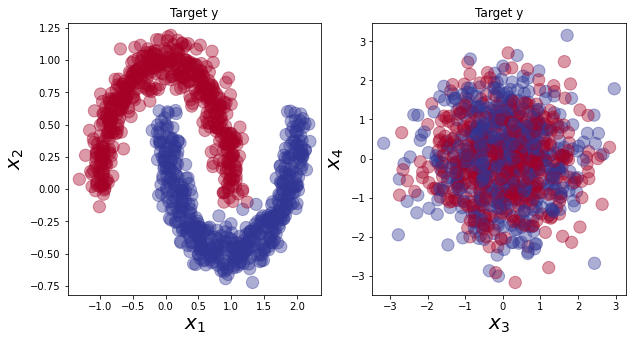

In [3]:
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,2], y=X_data[:,3], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[1].set_xlabel('$x_3$',fontsize=20)
ax[1].set_ylabel('$x_4$',fontsize=20)
ax[1].set_title('Target y')
plt.tick_params(labelsize=10)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

In [5]:
args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu")
#torch.backends.cudnn.benchmark = True
feature_selection = True
model = STG(task_type='classification',input_dim=X_train.shape[1], output_dim=2, hidden_dims=[60, 20], activation='tanh',
    optimizer='SGD', learning_rate=0.1, batch_size=X_train.shape[0], feature_selection=feature_selection, sigma=0.5, lam=0.5, random_state=1, device=device)


In [9]:
model.fit(X_train, y_train, nr_epochs=6000, valid_X=X_valid, valid_y=y_valid, print_interval=1000)

Epoch: 1000: loss=0.712161 val_loss=0.693507
Epoch: 2000: loss=0.701529 val_loss=0.693928
Epoch: 3000: loss=0.695491 val_loss=0.694277
Epoch: 4000: loss=0.694813 val_loss=0.694599
Epoch: 5000: loss=0.696463 val_loss=0.694712
Epoch: 6000: loss=0.693849 val_loss=0.694744


In [49]:
model.get_gates(mode='prob')

array([0.14360908, 0.9092165 , 0.38842362, 0.37770718, 0.4860622 ,
       0.5590223 , 0.5461793 , 0.55178773, 0.45957378, 0.5392192 ,
       0.2967098 , 0.46431413, 0.503856  , 0.5184754 , 0.46897998,
       0.2295511 , 0.47195575, 0.5344727 , 0.5160283 , 0.17738503],
      dtype=float32)

In [36]:
model.get_gates(mode='raw') 

array([ 0.40021124, -0.34948823, -0.07020106, -0.07376993, -0.0303926 ,
       -0.2118606 , -0.02719907, -0.13367528, -0.3135545 , -0.15187633,
       -0.1327147 , -0.09796566, -0.03134982, -0.19012816,  0.00606499,
       -0.10004885, -0.0558358 ,  0.06214814,  0.0526351 ,  0.03065781],
      dtype=float32)

## Testing the model

In [37]:
y_pred=model.predict(X_data)

In [38]:
y_pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [29]:
y_data[:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

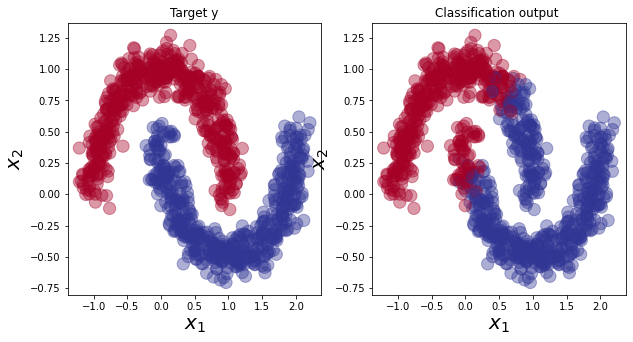

In [30]:
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_pred.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[1].set_title('Classification output ')
plt.tick_params(labelsize=10)